This notebook uses data from the ABCD Study to predict a measure of SSRT from stop signal task data.

In [1]:
from BPt import BPt_ML
import pandas as pd
import os

import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain, plot_stat_map

# We will use some extra loading functions
from Neuro_Plotting.Ref import SurfRef, VolRef, load_mapping, save_mapping
from Neuro_Plotting.Plot import Plot_Surf, Plot_Surf_Collage, Plot_SurfVol_Collage

In [2]:
# Base data directories, 2.0 release with most of the phenotype information
main_dr = '/home/sage/work/'

nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Destr atlas structural MRI rois
data1 = os.path.join(nda_dr2, 'mrisst02.txt')
data2 = os.path.join(nda_dr2,'abcd_tfsstabwdp101.txt')
data3 = os.path.join(nda_dr2, 'abcd_tfsstabwdp201.txt')

# Family ID
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

# This file contains the NIH toolbox scores
target_loc = nda_dr + 'abcd_sst02.txt'

In [3]:
ML = BPt_ML(exp_name = 'SSRT',
            log_dr = None,
            existing_log = 'append',
            notebook = True,
            use_abcd_subject_ids = False,
            low_memory_mode = False,
            random_state = 1,
            verbose = True)

exp_name = SSRT
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
n_jobs = 1
dpi = 100
mp_context = loky
BPt_ML object initialized


In [4]:
# Exclude subjects w/ data from philips scanners
ML.Load_Exclusions('philips.txt')

ML.Load_Name_Map(loc = map_file,
                 dataset_type= 'explorer',
                 source_name_col= 'nda_name',
                 target_name_col= 'deap_name')

Total excluded subjects:  1513
Removed excluded subjects from loaded dfs
Setting default load params, as they have not been set!

Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: ['777', '999']
drop_na: True
drop_or_na: drop

To change the default load params, call self.Set_Default_Load_Params()

Loading /home/sage/work/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv  with dataset type: explorer
Loading new name_map from file!


In [5]:
# These drop keys are to narrow in on only the subcortical volumes of interest
drop_keys = ['_csf', '.white.matter', '.vent', '_cort.desikan_', 'all_beta']

# These are to specify the contrasts we want to load
contrast_keys = ['tfmri_sst_all_correct.go.vs.fixation_beta_', 
                 'tfmri_sst_all_correct.stop.vs.correct.go_beta_',
                 'tfmri_sst_all_incorrect.stop.vs.correct.go_beta_']

ML.Load_Data(loc = [data1, data2, data3],
             inclusion_keys = contrast_keys,
             drop_keys=drop_keys,
             clear_existing=True,
             drop_na=False,
             subject_id='src_subject_id',
             dataset_type = 'basic',
             filter_outlier_std = 10)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
dropped ['collection_id', 'mrisst02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'tfmri_sa_beta_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Dropped 1183 excluded subjects
Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp101.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Dropped 1183 excluded subjects
Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp201.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Dropped 1183 excluded subj

In [6]:
#ML.Show_Data_Dist()

Make sure you include essentially the longest unique key in the name you want, e.g., if you just want correct go, by passing "correct.go." you will also pick up "incorrect.go." so instead 'tfmri_sst_all_correct.go.vs.fixation_beta_' is very conservative, and will get you just correct go.

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_sst02.txt  with dataset type: basic
Dropped 1232 excluded subjects
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: tfmri_sst_all_beh_total_mean.rt
Filtering for outliers by stds: (3, 10)
Min-Max value (pre-filter): -692.0 702.69230769
Min-Max value (post outlier filtering): 53.16666667 702.69230769

Dropped 100 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (8266, 1)
All loaded targets
0 : tfmri_sst_all_beh_total_mean.rt

Set to overlapping loaded subjects.
-- tfmri_sst_all_beh_total_mean.rt --


,tfmri_sst_all_beh_total_mean.rt
count,7417.000
mean,304.837
std,72.511
min,53.167
25%,259.333
50%,301.684
75%,347.076
max,702.692
median,301.684
skew,0.295


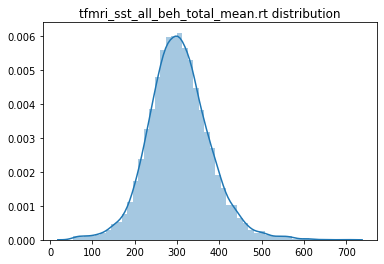

In [7]:
ML.Load_Targets(target_loc,
                dataset_type='basic',
                col_name='tfmri_sst_all_beh_total_meanrt',
                data_type='float',
                filter_outlier_std=(3, 10),
                clear_existing=True)

dfs = ML.Show_Targets_Dist(return_display_dfs=True)

In [8]:
ML.Load_Covars(loc = data1,
               col_name = 'sex',
               drop_na = False,
               data_type = 'b')

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
Dropped 1183 excluded subjects
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 1
loading: sex
Loaded Shape: (7735, 1)


In [9]:
ML.Load_Strat(loc = data1,
              col_name = 'sex')

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
Dropped 1183 excluded subjects
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (7734, 1)


In [10]:
ML.Train_Test_Split(test_size=0.2,
                    random_state=1001)

Calling Prepare_All_Data() to change the default merge behavior call it again!
Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (7416, 498)
Performing split on 7416 subjects!
random_state: 1001
Test split size: 0.2

Performed train test split
Train size: 5932
Test size:  1484


## On to modelling

In [11]:
from BPt import Problem_Spec, Model, Scaler, Transformer, Param_Search, Model_Pipeline, Select

In [12]:
ML.Set_Default_ML_Verbosity(compute_train_score = False,
                            fold_sizes = True,
                            progress_loc = None)

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
pipeline_verbose: False
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: True
best_params: False
best_params_score: False
save_to_logs: False
flush: False



In [13]:
spec = Problem_Spec(problem_type = 'regression',
                    scorer = 'r2',
                    random_state = 51,
                    n_jobs = 1)

ridge = Model('ridge', params=1)

scalers = [Scaler('winsorize', scope='float'),
           Scaler('standard', scope='float')]

ohe_sex = Transformer(obj="one hot encoder", scope='sex')

search = Param_Search(search_type = 'DE',
                      n_iter = 100,
                      splits = .5,
                      n_repeats = 3)

pipeline = Model_Pipeline(imputers='default',
                          transformers=[ohe_sex],
                          scalers = scalers,
                          model = ridge,
                          param_search = search)

eval_results = ML.Evaluate(model_pipeline = pipeline,
                           problem_spec = spec,
                           splits = .5,
                           n_repeats = 1,
                           feat_importances = 'base')

[Imputer(obj='mean', scope='float'), Imputer(obj='median', scope='cat')]
Passed default imputers, setting to: None
Model_Pipeline
--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
[Scaler(obj='winsorize'),
 Scaler(obj='standard')]

transformers=\
Transformer(obj='one hot encoder', scope='sex')

model=\
Model(obj='ridge', params=1)

param_search=\
Param_Search(n_iter=100, n_repeats=3, search_type='DE', splits=0.5)



Problem_Spec
------------
problem_type = regression
target = tfmri_sst_all_beh_total_mean.rt
scorer = r2
weight_scorer = False
scope = all
subjects = all
len(subjects) = 7416 (before overlap w/ train/test subjects)
n_jobs = 1
random_state = 51

Evaluate Params
---------------
splits = 0.5
n_repeats = 1
cv = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 5932 (before overlap w/ problem_spec.subjects)
run_name = ridge



Train shape: (2966, 497)
Val/Test shape: (2966, 497)



Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.09591126225964142
Std in Validation score:  0.0



In this example we will just assume this is fine, and move forward with testing, not even going to try the elastic net even though we defined it.

In [14]:
test_results = ML.Test(model_pipeline = pipeline,
                       problem_spec = spec,
                       feat_importances = 'base')

Model_Pipeline
--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
[Scaler(obj='winsorize'),
 Scaler(obj='standard')]

transformers=\
Transformer(obj='one hot encoder', scope='sex')

model=\
Model(obj='ridge', params=1)

param_search=\
Param_Search(n_iter=100, n_repeats=3, search_type='DE', splits=0.5)



Problem_Spec
------------
problem_type = regression
target = tfmri_sst_all_beh_total_mean.rt
scorer = r2
weight_scorer = False
scope = all
subjects = all
len(subjects) = 7416 (before overlap w/ train/test subjects)
n_jobs = 1
random_state = 51

Test Params
---------------
train_subjects = train
len(train_subjects) = 5932 (before overlap w/ problem_spec.subjects)
test_subjects = test
len(test_subjects) = 1484 (before overlap w/ problem_spec.subjects)
feat_importances = Feat_Importance(obj='base', shap_params=None)
run_name = ridge

Train shape: (5932, 497)
Val/Test shape: (1484, 497)

Testing Scores
______________
Scorer:  r2
T

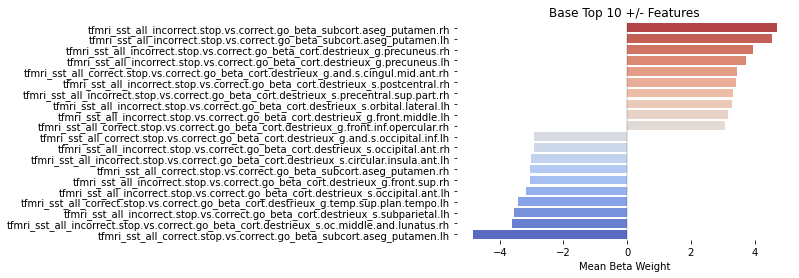

In [15]:
ML.Plot_Global_Feat_Importances(test_results['FIs'][0], top_n=10)

### Neuro_plotting

This next portion of the notebook will use an external library developed for plotting. You can download it at https://github.com/sahahn/Neuro_Plotting

In [16]:
# The directory where you install Neuro_Plotting
data_dr = '/home/sage/Neuro_Plotting/data/'

In [17]:
feats_df = test_results['FIs'][0].global_df.transpose()
feats_df = feats_df.reset_index()

In [18]:
feats_df

,index,0
0,sex_0,0.011387
1,sex_1,-0.011387
2,tfmri_sst_all_correct.go.vs.fixation_beta_cort...,0.018120
3,tfmri_sst_all_correct.go.vs.fixation_beta_cort...,0.196673
4,tfmri_sst_all_correct.go.vs.fixation_beta_cort...,0.212141
...,...,...
492,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,4.698369
493,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-1.330000
494,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-2.055501
495,tfmri_sst_all_incorrect.stop.vs.correct.go_bet...,-1.649214


In [19]:
surf_ref = SurfRef(data_dr, space='fsaverage5', parc='destr')

In [20]:
betas = []
for c_key in contrast_keys:
    betas.append(surf_ref.get_hemis_plot_vals(feats_df, '.lh', '.rh', i_keys=['.destrieux', c_key]))

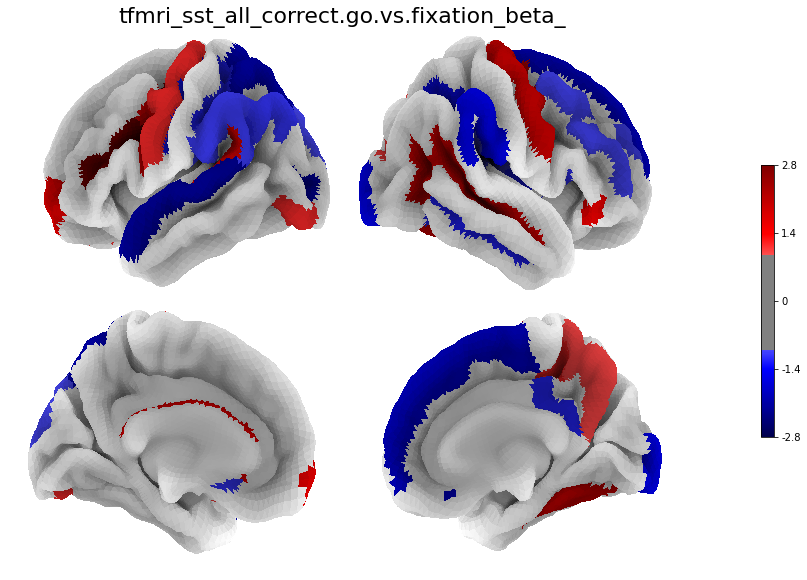

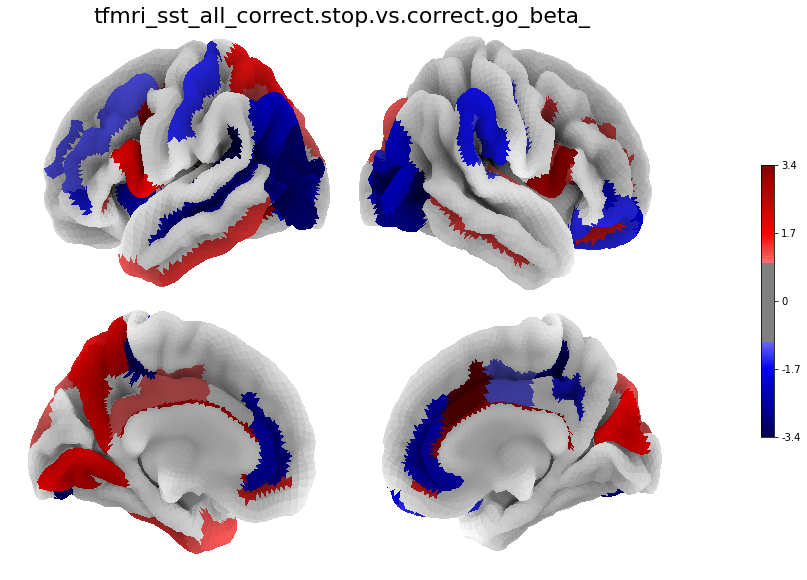

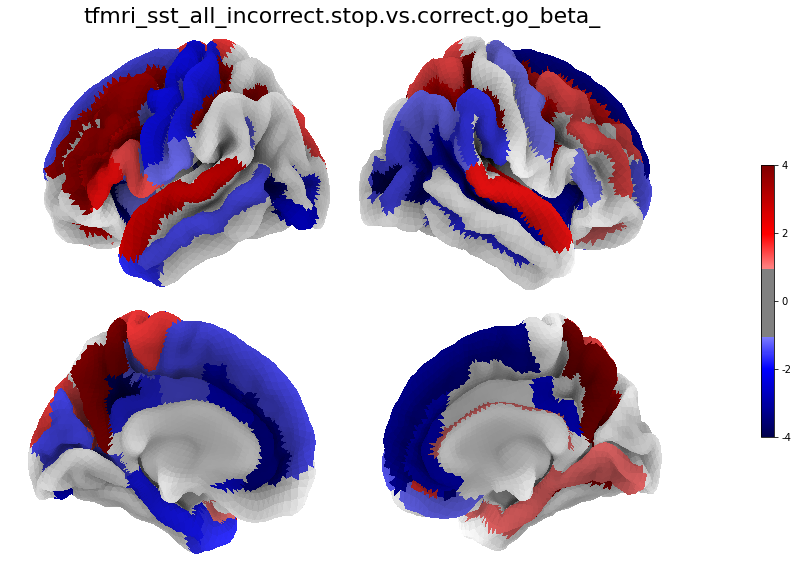

In [21]:
for i in range(len(betas)):
    figure, axes, smf = Plot_Surf_Collage(data = betas[i],
                                          ref = surf_ref,
                                          surf_mesh = 'pial',
                                          bg_map = 'sulc',
                                          view = 'standard',
                                          cmap = 'seismic',
                                          title = contrast_keys[i],
                                          title_sz = 22,
                                          threshold = 1,
                                          wspace = 0,
                                          hspace = 0,
                                          figsize = (15, 10),
                                          avg_method = 'median',
                                          bg_on_data = True,
                                          alpha = 1,
                                          colorbar = True)

    #plt.savefig(contrast_keys[i] + '.png', dpi=100, bbox_inches='tight')

### Below is just playing around with making a gif of subcortical activation (it could certainly be developed a bit more)

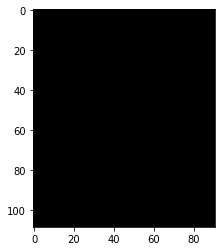

In [22]:
from nilearn.datasets import load_mni152_template
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

vol_ref = VolRef(data_dr, space='mni', parc='aseg_2mm')
bkg_img = load_mni152_template().get_fdata().T
vol_vals = vol_ref.get_plot_vals(feats_df, i_keys=['_subcort.aseg']).get_fdata().T

cmap = cm.get_cmap('Reds')
colored = cmap(vol_vals)[:,:,:,:3] * 255
colored = colored.astype(int)

# Normalize to 255
mx = np.max(bkg_img)
mn = np.min(bkg_img)

bkg_img -= mn
bkg_img *= (255 / (mx - mn))
bkg_img = bkg_img.astype(int)

threshold = .5

fig, ax = plt.subplots()
def update(s):
    
    slc = bkg_img[s]
    stacked = np.stack([slc, slc, slc], axis=-1)
    vals_slc = vol_vals[s]

    inds = np.where(vals_slc > threshold)
    if len(inds[0]) > 0:
        
        stacked[inds] = colored[s][inds]

    plt.imshow(stacked)

ani = FuncAnimation(fig, update, frames=[s for s in range(len(bkg_img))])

# Uncomment and save to see this gif
#ani.save('subcortical.gif', writer='imagemagick')